<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 
### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# `numpy`: file I/O

# Objective
* introduce `numpy` file I/O operations

# Resources
* [numpy.org](http://www.numpy.org)
* [`numpy` I/O](https://docs.scipy.org/doc/numpy/reference/routines.io.html)

In [1]:
import numpy as np
import numpy.random as rng

nRow = 3
nCol = 2

In [2]:
x = rng.rand(nRow,nCol)
print(x)

[[0.3518084  0.77910418]
 [0.75008715 0.17712058]
 [0.18355787 0.06227917]]


In [3]:
y = x.transpose()
print(y)

[[0.3518084  0.75008715 0.18355787]
 [0.77910418 0.17712058 0.06227917]]


# `np.save()`
Save a single array to a binary file in `.npy` format.

In [4]:
np.save('foo.npy', x)

In [5]:
# access the files by magic
%ls -l foo.npy

-rw-r--r-- 1 pi pi 176 Oct 10 20:41 foo.npy


In [6]:
# display file content by magic
%cat foo.npy

�NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (3, 2), }                                                          
r�^_��?%C��k��?�ٙĶ �?�[�"��?\e��~�?�@
�?

In [7]:
# binary save is fast
a = rng.rand(1000,1000)
%time np.save('a.npy', a)

CPU times: user 116 µs, sys: 39.7 ms, total: 39.8 ms
Wall time: 40 ms


# `np.savetxt()`
Save an array to a text file.

In [8]:
np.savetxt('foo.csv', x, fmt='%4.1f', delimiter=',')

In [9]:
# access the files by magic
%ls -l *.csv

-rw-r--r-- 1 pi pi 30 Oct 10 20:43 foo.csv


In [10]:
# display file content by magic
%cat foo.csv

 0.4, 0.8
 0.8, 0.2
 0.2, 0.1


In [12]:
# text save is slow
a = rng.rand(1000,1000)
%time np.savetxt('a.csv', a, fmt='%f', delimiter=',')

CPU times: user 675 ms, sys: 37.3 ms, total: 713 ms
Wall time: 722 ms


# `np.savez()`

Save multiple arrays to a binary file in uncompressed `.npz` format.

In [13]:
np.savez('foo.npz', x,y)

In [14]:
# access the files by magic
%ls -l *.npz

-rw-r--r-- 1 pi pi 602 Oct 10 20:44 foo.npz


In [15]:
# display file content by magic
%cat foo.npz

PK       ! �̰   �   	  arr_0.npy  �       �       �NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (3, 2), }                                                          
r�^_��?%C��k��?�ٙĶ �?�[�"��?\e��~�?�@
�?PK       ! <���   �   	  arr_1.npy  �       �       �NUMPY v {'descr': '<f8', 'fortran_order': True, 'shape': (2, 3), }                                                           
r�^_��?%C��k��?�ٙĶ �?�[�"��?\e��~�?�@
�?PK       ! �̰   �   	           �    arr_0.npyPK       ! <���   �   	           ��   arr_1.npyPK      n   �    

# `np.load()`
Load arrays from files stored in `numpy` .npy format.

In [16]:
print('x=',x)

x= [[0.3518084  0.77910418]
 [0.75008715 0.17712058]
 [0.18355787 0.06227917]]


In [17]:
t = np.load('foo.npy')
print('t=',t)

t= [[0.3518084  0.77910418]
 [0.75008715 0.17712058]
 [0.18355787 0.06227917]]


In [18]:
# load multiple arrays at once
t = np.load('foo.npz')

# list the arrays available in t
print(t.files)

['arr_0', 'arr_1']


In [19]:
# extract the arrays from t
t1 = t['arr_0']
t2 = t['arr_1']

print(t1,'\n')
print(t2,'\n')

[[0.3518084  0.77910418]
 [0.75008715 0.17712058]
 [0.18355787 0.06227917]] 

[[0.3518084  0.75008715 0.18355787]
 [0.77910418 0.17712058 0.06227917]] 



# `np.loadtxt()`
Load data from a text file.

In [20]:
z = np.loadtxt('foo.csv', delimiter=',')

print('z=',z)

z= [[0.4 0.8]
 [0.8 0.2]
 [0.2 0.1]]


# `tempfile` module

Generates temporary files or directories for short-term data storage.

In [22]:
import tempfile

In [23]:
# open a temp file and do not delete it after use
fp = tempfile.NamedTemporaryFile( delete=False ) 

# get the temp file name
# must append .npy extension!
fname = fp.name + '.npy' 
print(fname)

/tmp/tmp5tommuz8.npy


In [24]:
print(x)

# write to temp file
np.save(fname, x)

[[0.3518084  0.77910418]
 [0.75008715 0.17712058]
 [0.18355787 0.06227917]]


In [25]:
# read from temp file
t = np.load(fname)

print(t)

[[0.3518084  0.77910418]
 [0.75008715 0.17712058]
 [0.18355787 0.06227917]]


In [26]:
import os

# remove temp file
os.remove(fname)

<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo
A 2D uncorrelated Gaussian function with center at ($c_x$,$c_y$) and standard deviations $\sigma_x,\sigma_y$ is defined as:

$$
f(x,y) = \dfrac{1}{2\pi\sigma_x\sigma_y} 
e^{ -\dfrac{1}{2} 
\left[
\left( \dfrac{x-c_x}{\sigma_x} \right)^2 +
\left( \dfrac{y-c_y}{\sigma_y} \right)^2
\right]
}
$$

* Generate and plot the Gaussian function. 
* Save the Gaussian decimated by a factor of $10$ in both $x$ and $y$. 
* Read the decimated Gaussian and plot it. 
* Verify that file sizes are consistent with the decimation factor.

Define coordinates $x$ and $y$.

In [27]:
xMin, xMax, dx = -2.0, +2.0, 0.02
yMin, yMax, dy = -2.0, +2.0, 0.02

x = np.arange(xMin, xMax + dx, dx)
y = np.arange(yMin, yMax + dx, dy)

X, Y = np.meshgrid(x,y)

Build the Gaussian function.

In [28]:
# center
cx = +0.5
cy = -0.5

# standard deviation
sx = 1.0
sy = 1.0

In [29]:
# compute Gaussian
A = np.power(2*np.pi*sx*sy,-1)
E = np.power( (X-cx)/sx,2 ) + np.power( (Y-cy)/sy,2 )

G = A * np.exp(-0.5*E)

In [31]:
import matplotlib.pyplot as plt

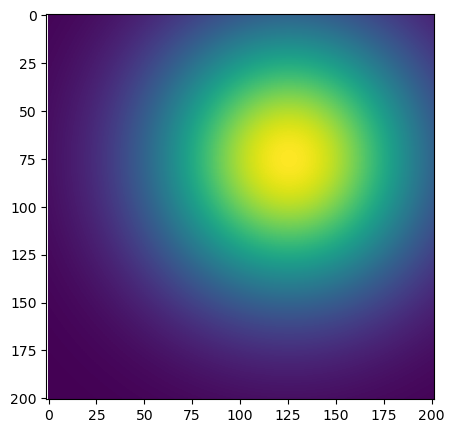

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(G)
plt.axis('equal');

Save the undecimated Gaussian.

In [34]:
print(np.shape(G))

np.save('gau.npy', G)

(201, 201)


Decimate the Gaussian and save.

In [35]:
j = 10 # Decimation factor

D = G[ ::j, ::j ] # decimate by slicing

In [36]:
print(np.shape(D))

np.save('dec.npy',D)

(21, 21)


Compare the file sizes.

In [37]:
%ls -latr gau.npy
%ls -latr dec.npy

-rw-r--r-- 1 pi pi 323336 Oct 10 21:00 gau.npy
-rw-r--r-- 1 pi pi 3656 Oct 10 21:01 dec.npy


Read and plot the decimated Gaussian

In [39]:
H = np.load('dec.npy')

print(np.shape(H))

(21, 21)


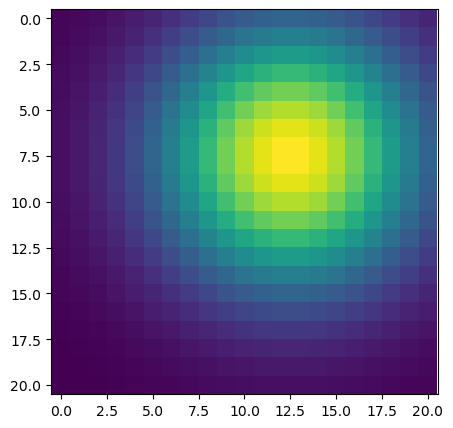

In [40]:
plt.figure(figsize=(5,5))
plt.imshow(H)
plt.axis('equal');

<img src="https://www.dropbox.com/s/wj23ce93pa9j8pe/demo.png?raw=1" width="10%" align="left">

# Exercise

<br> <br>
* Make two large time series $u_1$ and $u_2$ and fill them with random numbers from a uniform distribution. Save them to `uu.npz`. 
* Make two other  time series $n_1$ and $n_2$ and fill them with random numbers from a normal distribution. Save them to `nn.npz`.

Read `uu.npz` and `nn.npz` and save two other `.npz` files containing $u_1$ & $n_1$, and $u_2$ & $n_2$, respectively.